In [42]:
import parser 
import pandas as pd
import itertools
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from voting_rules import voting_rules as vr
import rcv_dimensionality
from sklearn.linear_model import LinearRegression

In [10]:
def is_consistent(ballot):
    if len(ballot) == 0: 
        return (True, None) 
    if len(ballot) == 1:
        return (True, ballot[0]) 
    x = 0 
    v = 0.25
    i = 1
    while (i < len(ballot)):
        if ballot[i] < ballot[i - 1]:
            x -= (v * min(abs(ballot[i] - ballot[0]), abs(ballot[i] - ballot[i - 1])))
        else:
            x += (v * min(abs(ballot[i] - ballot[0]), abs(ballot[i] - ballot[i - 1])))
        v *= 0.5
        i += 1
    l = []
    if abs(x) >= (ballot[1] - ballot[0])/2 or x == 0:
        return (False, x + ballot[0]) 
    x += ballot[0]
    for c in ballot:
        l.append(abs(c - x))
    if(all(l[i] <= l[i + 1] for i in range(len(l) -  1))):
        return (True, x)
    return (False, x)

In [59]:
def plot(filename, mcp, mcp_num):

    ballots, candidates = parser.parser(filename)
    election = vr(ballots, candidates)
    print (election.irv())
    #plotting based on consistency based on the distances of the candiates
    points = {}
    temp = {}
    for i in range(len(mcp)):
        temp[mcp[i]] = mcp_num[i]
    
    for b in ballots:
        b_num = []
        for c in b:
            b_num.append(temp[c])
        
        t = is_consistent(b_num)
        if t[0] is True and t[1] is not None:
            x = t[1] 
            if x not in points:
                points[x] = 0
            points[x] += ballots[b]


    
    
   
    plt.figure(figsize=(10, 6))

    for x, y in points.items():
        for i in range(len(mcp_num)):
            if x == mcp_num[i]:
                c = mcp[i]
                plt.text(x, -10000, c, ha='center', va='top', fontsize=10)
                plt.scatter(x, -5000, color='r')
        plt.scatter(x, y, color='b')
  

/Users/Mahshad/Documents/GitHub/bugs-in-democracy/team_arrow/cvr_class/rcv_dimensionality.py:163: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


{'Bye, Chris': 0.0, 'Palin, Sarah': 1.2414500673572615, 'Begich, Nick': 1.7099407877359787, 'Peltola, Mary S.': 3.0}
<class 'dict'>
Peltola, Mary S.


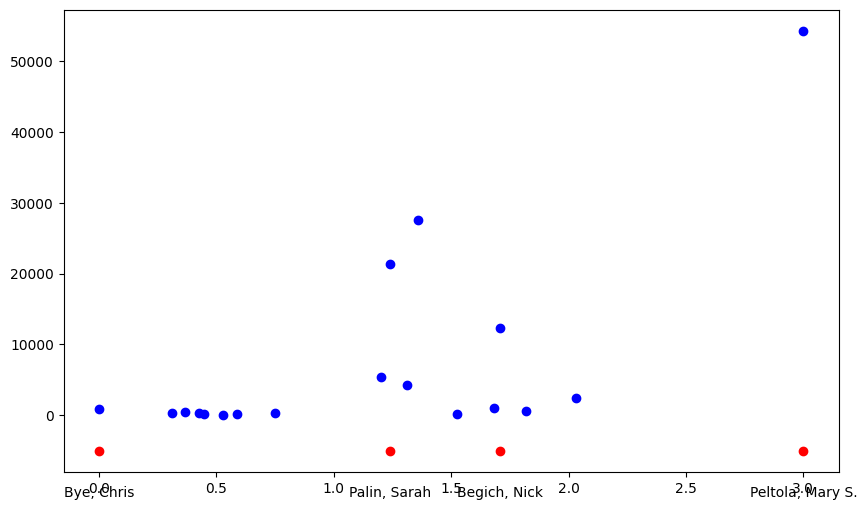

In [60]:
filename = "dataverse_files/Alaska_11082022_USRepresentative.csv"
d = rcv_dimensionality.perform_rcv_and_normalize(filename)

print(d)
print(type(d))
mcp = []
mcp_num = []
for k in d:
    mcp.append(k)
    mcp_num.append(d[k])


plot(filename, mcp, mcp_num)
#plot("dataverse_files/Maine_11062018_CongressionalDistrict2.csv", ["REP Poliquin, Bruce", "Hoar, William R.S.", "Bond, Tiffany L.", "DEM Golden, Jared F." ], [1, 2, 3, 4])